### MGT451 - Assignment #1 ~ Optimal Prediction

**Author**: Sid Bhatia

**Date**: September 23, 2023

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Dr. Jordan Suchow

Below are the instructions for the assignment:

1. Read the paper *Optimal Predictions in Everyday Cognition.*

2. Think of a new everyday phenomenon not included in the original study. Use a domain for which empirical evidence about the event's duration exists, and find that data. Pick something you find fun and interesting.

3. Reproduce the prediction experiment with a friend or two, collecting their predicted $t_{total}$ as a function of $t$.

4. Create two plots, following the style of $\text{Fig. 2}$ in the paper. The upper plot should show the empirical distribution of durations you found in Step 2. The lower plot should show both the empirical data you collected in Step 3, as well as the predicted predictions given by the delta $t$ argument.

5. Optionally, reproduce the solid black line based on the empirical distribution from Step 2.
6. Create a 1-page PDF containing the plots from Step 4 and a 1-paragraph description of the domain you selected.

#### Data Collection

For this assignment, I have chosen to evaluate NYPD Crime Data and want to explore the empirical distributions of crime as a function as time. Specifically, do more crimes happen at certain periods in the day in NYC? We use this data to define the population distributions of crime and then will compare it to the prediction experiment.

Using the **NYPD_Complaint_Data_Current__Year_To_Date_.csv** data, we 36 columns/fields, but we solely care about the following:
- *CMPLNT_NUM*: Randomly generated persistent ID for each complaint.
- *CMPLNT_FR_TM*: Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists).

In [19]:
# Import necessary libraries
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'NYPD_Complaint_Data_Current__Year_To_Date_.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

# Drop rows with NA values in the 'CMPLNT_FR_TM' column
df = df.dropna(subset=['CMPLNT_FR_TM'])

    CMPLNT_NUM  ADDR_PCT_CD        BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM   
0    264551409         43.0          BRONX   03/04/2023     12:55:00  \
1  268554247H1          NaN  STATEN ISLAND   05/19/2023     15:52:00   
2    270383297         52.0          BRONX   06/24/2023     14:35:00   
3    267154459         32.0      MANHATTAN   04/01/2022     15:00:00   
4    262715874         30.0      MANHATTAN   12/29/2022     00:00:00   

  CMPLNT_TO_DT CMPLNT_TO_TM CRM_ATPT_CPTD_CD HADEVELOPT  HOUSING_PSA  ...   
0          NaN       (null)        COMPLETED     (null)          NaN  ...  \
1          NaN       (null)        COMPLETED     (null)          NaN  ...   
2          NaN       (null)        COMPLETED     (null)          NaN  ...   
3   04/01/2023     15:00:00        COMPLETED     (null)          NaN  ...   
4   01/29/2023     16:00:00        COMPLETED     (null)          NaN  ...   

   Y_COORD_CD   Latitude  Longitude                  Lat_Lon   
0    239111.0  40.822882 -73.848929  (40

#### Empricial Distribution Plotting

The following code plots the empirical distribution of the different times and the number of crimes occurred at that time.

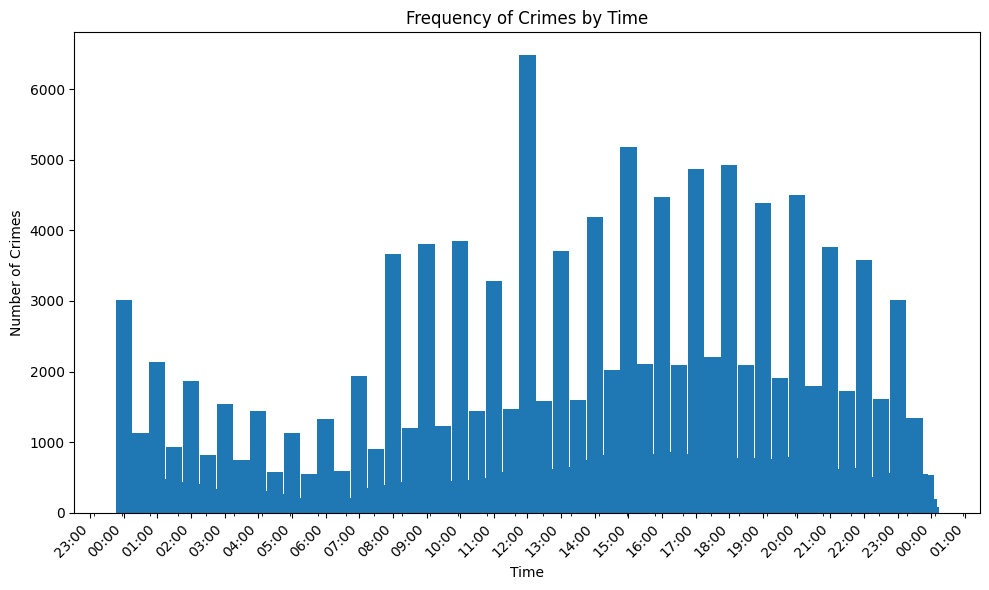

In [37]:
# Import libraries to plot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert "CMPLNT_FR_TM" to datetime type for easier handling
## df['CMPLNT_FR_TM'] = pd.to_datetime(df['CMPLNT_FR_TM']).dt.time

# Count the frequency of each time
time_freq = df['CMPLNT_FR_TM'].value_counts().sort_index()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Convert times back to datetime for plotting
times_as_datetime = [pd.Timestamp(f"2000-01-01 {t}") for t in time_freq.index]
ax.bar(times_as_datetime, time_freq.values, width = 0.02)

# Adjust x-axis
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=50))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.title('Frequency of Crimes by Time')
plt.xlabel('Time')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()